# Pydy Tuesday 08-07-2025 - Color Survey Data

### 1. Import Libraries

In [2]:
import sys
import pydytuesday
import pandas as pd

# For Data Visualisation
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print("Python:", sys.version)
print("pandas:", pd.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)

Python: 3.12.3 (tags/v3.12.3:f6650f9, Apr  9 2024, 14:05:25) [MSC v.1938 64 bit (AMD64)]
pandas: 2.3.0
matplotlib: 3.6.2
seaborn: 0.13.2


### 2. Load Data from the official pydytuesday repo

In [4]:
# Use date to fetch the files for that week
pydytuesday.get_date('2025-07-08')

Trying to fetch README from: https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2025/2025-07-08/readme.md
Successfully fetched README from: https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2025/2025-07-08/readme.md
Successfully saved answers.csv to d:\SAUVIK\Projects\Pydy_Tuesdays\Pydy_08072025\answers.csv
Successfully saved color_ranks.csv to d:\SAUVIK\Projects\Pydy_Tuesdays\Pydy_08072025\color_ranks.csv
Successfully saved meta.yaml to d:\SAUVIK\Projects\Pydy_Tuesdays\Pydy_08072025\meta.yaml
Successfully saved users.csv to d:\SAUVIK\Projects\Pydy_Tuesdays\Pydy_08072025\users.csv
Successfully saved xkcd-colors.png to d:\SAUVIK\Projects\Pydy_Tuesdays\Pydy_08072025\xkcd-colors.png


In [5]:
# Load datasets using Pandas 
answers = pd.read_csv('answers.csv')
color_ranks = pd.read_csv('color_ranks.csv')
users = pd.read_csv('users.csv')

# Store all the files in a dictionary
datafiles = {
    "answers": answers,
    "color_ranks": color_ranks,
    "users": users,
}

# Print info for all the files
for filename, df in datafiles.items():
    print(f" {filename} Info: \n")
    print(df.info())
    print("\n" + "-"*60 + "\n")


 answers Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058211 entries, 0 to 1058210
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1058211 non-null  int64 
 1   hex      1058211 non-null  object
 2   rank     1058211 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 24.2+ MB
None

------------------------------------------------------------

 color_ranks Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   color   949 non-null    object
 1   rank    949 non-null    int64 
 2   hex     949 non-null    object
dtypes: int64(1), object(2)
memory usage: 22.4+ KB
None

------------------------------------------------------------

 users Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152401 entries, 0 to 152400
Data columns (total 5 columns):
 #   Col

In [6]:
# Rename 'hex' fields to clarify meaning
answers = answers.rename(columns={"hex": "hex_original"})
color_ranks = color_ranks.rename(columns={"hex": "hex_perceived"})

# Merge
merged_df = pd.merge(answers, color_ranks, on="rank", how="left")
final_df = pd.merge(merged_df, users, on="user_id", how="left")

pd.set_option('display.width', 1000)
print(final_df.info())
print(final_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058211 entries, 0 to 1058210
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   user_id        1058211 non-null  int64  
 1   hex_original   1058211 non-null  object 
 2   rank           1058211 non-null  int64  
 3   color          1058211 non-null  object 
 4   hex_perceived  1058211 non-null  object 
 5   monitor        1058211 non-null  object 
 6   y_chromosome   1030078 non-null  float64
 7   colorblind     1011907 non-null  float64
 8   spam_prob      1058211 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 72.7+ MB
None
            user_id          rank  y_chromosome    colorblind     spam_prob
count  1.058211e+06  1.058211e+06  1.030078e+06  1.011907e+06  1.058211e+06
mean   7.726105e+04  2.499218e+00  6.829803e-01  5.096120e-02  1.259867e-01
std    4.354808e+04  1.182559e+00  4.653154e-01  2.199186e-01  2.704004e-01
min    1.0

In [7]:
print(final_df.head(20))

    user_id hex_original  rank   color hex_perceived monitor  y_chromosome  colorblind  spam_prob
0         1      #8240EA     1  purple       #7e1e9c     LCD           1.0         0.0   0.002088
1         2      #4B31EA     3    blue       #0343df     LCD           1.0         0.0   0.074577
2         2      #584601     5   brown       #653700     LCD           1.0         0.0   0.074577
3         2      #DA239C     4    pink       #ff81c0     LCD           1.0         0.0   0.074577
4         2      #B343E5     1  purple       #7e1e9c     LCD           1.0         0.0   0.074577
5         2      #45FF29     2   green       #15b01a     LCD           1.0         0.0   0.074577
6         2      #29C9EA     3    blue       #0343df     LCD           1.0         0.0   0.074577
7         2      #4961EC     3    blue       #0343df     LCD           1.0         0.0   0.074577
8         4      #9A2A9F     1  purple       #7e1e9c     LCD           0.0         0.0   0.001562
9         4      #74

In [8]:
print(final_df.isnull().sum())

user_id              0
hex_original         0
rank                 0
color                0
hex_perceived        0
monitor              0
y_chromosome     28133
colorblind       46304
spam_prob            0
dtype: int64


In [9]:
df = final_df.dropna()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1001293 entries, 0 to 1058210
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   user_id        1001293 non-null  int64  
 1   hex_original   1001293 non-null  object 
 2   rank           1001293 non-null  int64  
 3   color          1001293 non-null  object 
 4   hex_perceived  1001293 non-null  object 
 5   monitor        1001293 non-null  object 
 6   y_chromosome   1001293 non-null  float64
 7   colorblind     1001293 non-null  float64
 8   spam_prob      1001293 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 76.4+ MB
None


In [ ]:
print("Rank:",df['rank'].unique())
print("Monitors:",df['monitor'].unique())
print("Colors:", df['color'].unique())
print("Hex perceived:", df['hex_perceived'])


Rank: [1 3 5 4 2]
Monitors: ['LCD' 'CRT' 'monitor-other']
Colors: ['purple' 'blue' 'brown' 'pink' 'green']
Hex perceived: 0          #7e1e9c
1          #0343df
2          #653700
3          #ff81c0
4          #7e1e9c
            ...   
1058206    #7e1e9c
1058207    #7e1e9c
1058208    #0343df
1058209    #15b01a
1058210    #7e1e9c
Name: hex_perceived, Length: 1001293, dtype: object



<AxesSubplot: xlabel='color'>

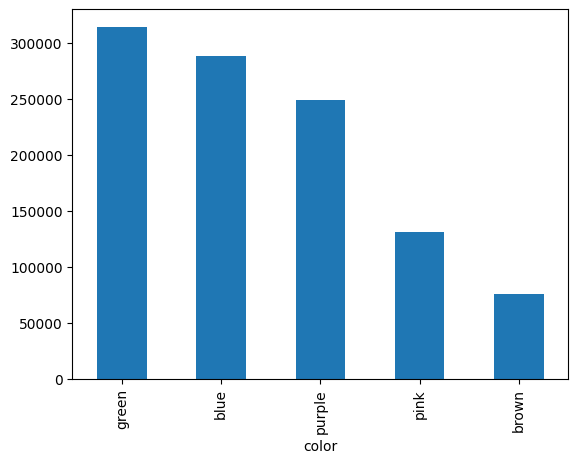

In [11]:
final_df['color'].value_counts().plot(kind='bar')


<AxesSubplot: xlabel='color', ylabel='count'>

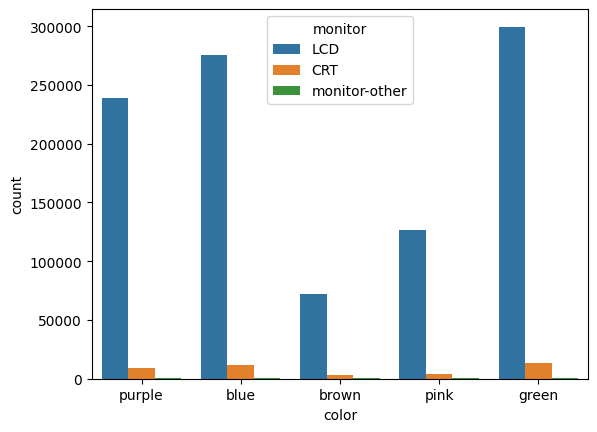

In [12]:
sns.countplot(data=final_df, x='color', hue='monitor')


<AxesSubplot: xlabel='monitor', ylabel='color'>

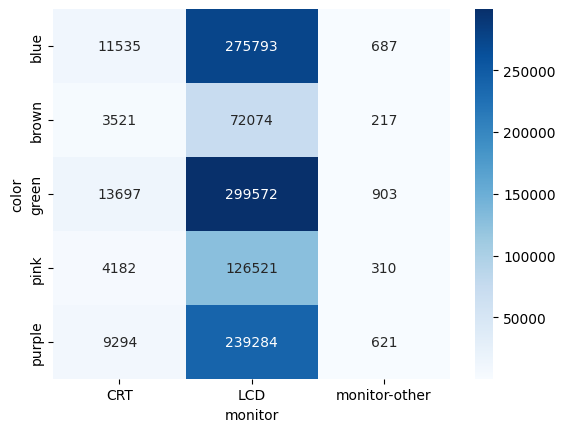

In [14]:
pivot = final_df.pivot_table(index='color', columns='monitor', values='user_id', aggfunc='count')
sns.heatmap(pivot, annot=True, fmt='d', cmap='Blues')